In [1]:
import tensorflow as tf
from keras import layers
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


4


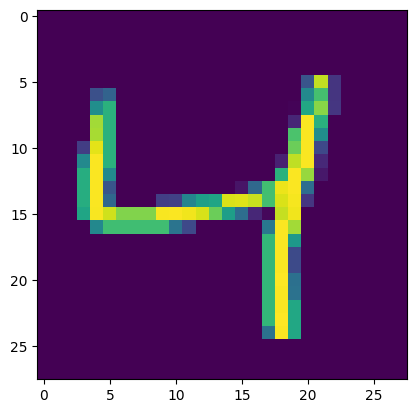

In [2]:
""" Visualize number thanks to matplotlib """
plt.imshow(train_images[2])
print(train_labels[2])

train_images = train_images / 255
test_images = test_images / 255



In [3]:
# Create the model
print(train_images.shape[1:])
model_lr = tf.keras.models.Sequential([
    layers.Input(train_images.shape[1:]),
    layers.Flatten(),
    layers.Dense(10, activation="softmax")
])

model_lr.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_lr.summary()

(28, 28)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
""" model_lr.fit(train_images, train_labels) ne marche pas car la sortie est sous forme de """
y_onehot_train = tf.one_hot(train_labels, 10)
print(y_onehot_train)
model_lr.fit(train_images, y_onehot_train)

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]], shape=(60000, 10), dtype=float32)
1875/1875 [==============================] - 1s 527us/step - loss: 0.4654 - accuracy: 0.8786


In [5]:
model_lr = tf.keras.models.Sequential([
    layers.Input(train_images.shape[1:]),
    layers.Flatten(),
    layers.Dense(10, activation="softmax")
])

model_lr.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_lr.summary()

Model: "sequential_1"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
history_lr = model_lr.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), verbose=False)

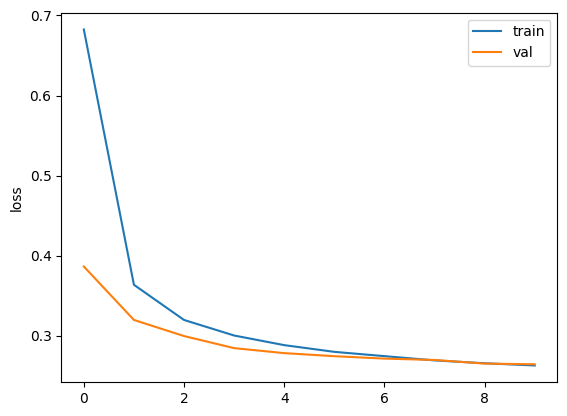

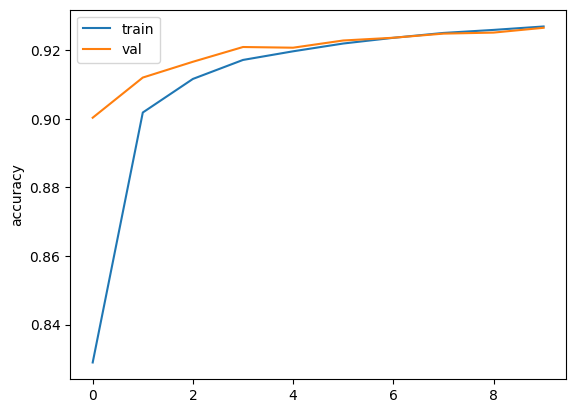

In [7]:
plt.plot(history_lr.history["loss"], label="train")
plt.plot(history_lr.history["val_loss"], label="val")
plt.ylabel("loss")
plt.legend()
plt.show()

plt.plot(history_lr.history["accuracy"], label="train")
plt.plot(history_lr.history["val_accuracy"], label="val")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [8]:
model_lr.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 592us/step - loss: 0.2641 - accuracy: 0.9265


[0.2641490399837494, 0.9265000224113464]

In [10]:
import numpy as np


probs = model_lr.predict(test_images[:5])
preds = np.argmax(probs, axis=1)

1/1 [==============================] - 0s 21ms/step
